In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("AdSmartABdata - AdSmartABdata.csv")

In [11]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


## Проверьте, есть ли эффект от изменения (exposed группа)

контрольная группа: пользователи, которым была показана фиктивная реклама
экспериментальная группа: пользователи, которым был показан креатив, интерактивная онлайн-реклама под брендом SmartAd.

#### За метрику я беру показатель нажатия на кнопку "Да" при показе рекламы, так как я считаю, что конверсия из показа рекламы в прохождение тестирования - целевое действие.

In [3]:
# создаем датафреймы
exposed = df[df['experiment'] == 'exposed']
control = df[df['experiment'] == 'control']

In [18]:
# конверсия в экспериментальной группе
p = exposed.yes.mean()
p

0.07688467299051423

In [19]:
# конверсия в контрольной группе
pc = control.yes.mean()
pc

0.06484893146647015

In [6]:
# число наблюдений в каждой из групп
n = exposed.yes.count()
nc = control.yes.count()

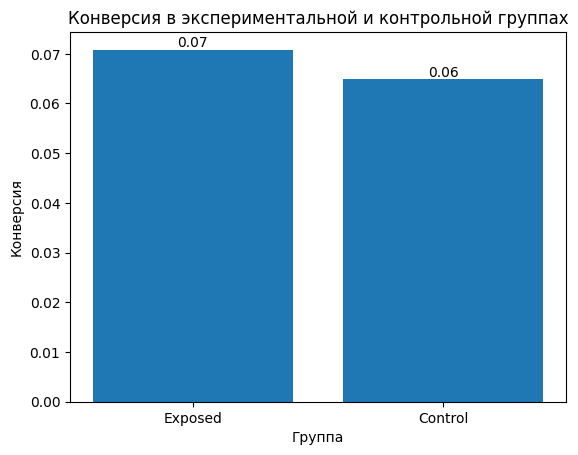

In [17]:
import matplotlib.pyplot as plt

groups = ['Exposed', 'Control']

conversion_rates = [p, pc]

plt.bar(groups, conversion_rates)
plt.xlabel('Группа')
plt.ylabel('Конверсия')
plt.title('Конверсия в экспериментальной и контрольной группах')
# Adding value labels to the bar chart
for i, v in enumerate(conversion_rates):
    plt.text(i, v, str(round(v,2)), ha='center', va='bottom')
plt.show()

In [7]:
# Нулевая гипотеза: две конверсии равны
# рассчитаем общую объединенную долю
p = (p*n + pc * nc)/(n +nc)
p

0.07081837315835088

In [8]:
import math
from scipy.stats import norm

In [9]:
#рассчитаем тестовую статистику z
z = (p - pc) / np.sqrt((p * (1 - p) / n) + (pc * (1 - pc) / nc))
z

1.0666076325713538

In [10]:
# Рассчитаем p-значение тестовой статистики z
p_value = 2 * (1 - norm.cdf(abs(z)))
p_value

0.2861490524460022

## Вывод: исходя из полученных результатов, нет статистически значимой разницы в конверсии между экспериментальной и контрольной группами. (p_value>0.05)